 This is a Project on Autism classification . A customer wants us to create an Autism classifier that can be used  in an app .
The dataset for use has several features and our main goal of this project is to use the features to build our model for 
production

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:\\Datasets\\Autism\\autism_screening.csv")

In [3]:
df.shape

(704, 21)

In [4]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

# Here is the Feature Description for our dataset 
    
Autism : whether someone in the family has been diagonised with Autism 
Jaundice : Whether the participant was born with jaundice
Used_App : Whether the participant has used the app before
Result : The result from the AQ-10 screening tool
Relation : Relation of the person who completed the test
Ax Score : This is based on the Autism Spectrum quotient
Class Asd : This the participants classification on whether or not they have autism

In [5]:
df.isnull().sum()


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())

In [7]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [8]:
for column in df.columns:
    print(f"The total unique values in {column} are {df[column].nunique()}")
    print('____________________________________________________________________')
    print(f"The most frequently appearing elements in {column} are{df[column].value_counts().head(10)}")

The total unique values in A1_Score are 2
____________________________________________________________________
The most frequently appearing elements in A1_Score are1    508
0    196
Name: A1_Score, dtype: int64
The total unique values in A2_Score are 2
____________________________________________________________________
The most frequently appearing elements in A2_Score are0    385
1    319
Name: A2_Score, dtype: int64
The total unique values in A3_Score are 2
____________________________________________________________________
The most frequently appearing elements in A3_Score are0    382
1    322
Name: A3_Score, dtype: int64
The total unique values in A4_Score are 2
____________________________________________________________________
The most frequently appearing elements in A4_Score are0    355
1    349
Name: A4_Score, dtype: int64
The total unique values in A5_Score are 2
____________________________________________________________________
The most frequently appearing elements in

In [9]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [10]:
df['ethnicity'] = df['ethnicity'].replace('?','Others')
df['relation'] = df['relation'].replace('?','Unspecified')

# Statistical Information about our features

In [11]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.483967,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [12]:
# Correlation>
correlation = df.corr()
correlation

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.022974,0.397454
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.020793,0.392540
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.029468,0.552356
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.032493,0.586025
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,-0.025060,0.639706
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.034686,0.630012
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.026493,0.454848
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.080225,0.324020
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.053967,0.661205
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,-0.008073,0.537205


#  DATA ANALYSIS : INSIGHTS AND A FEEL OF OUR DATA

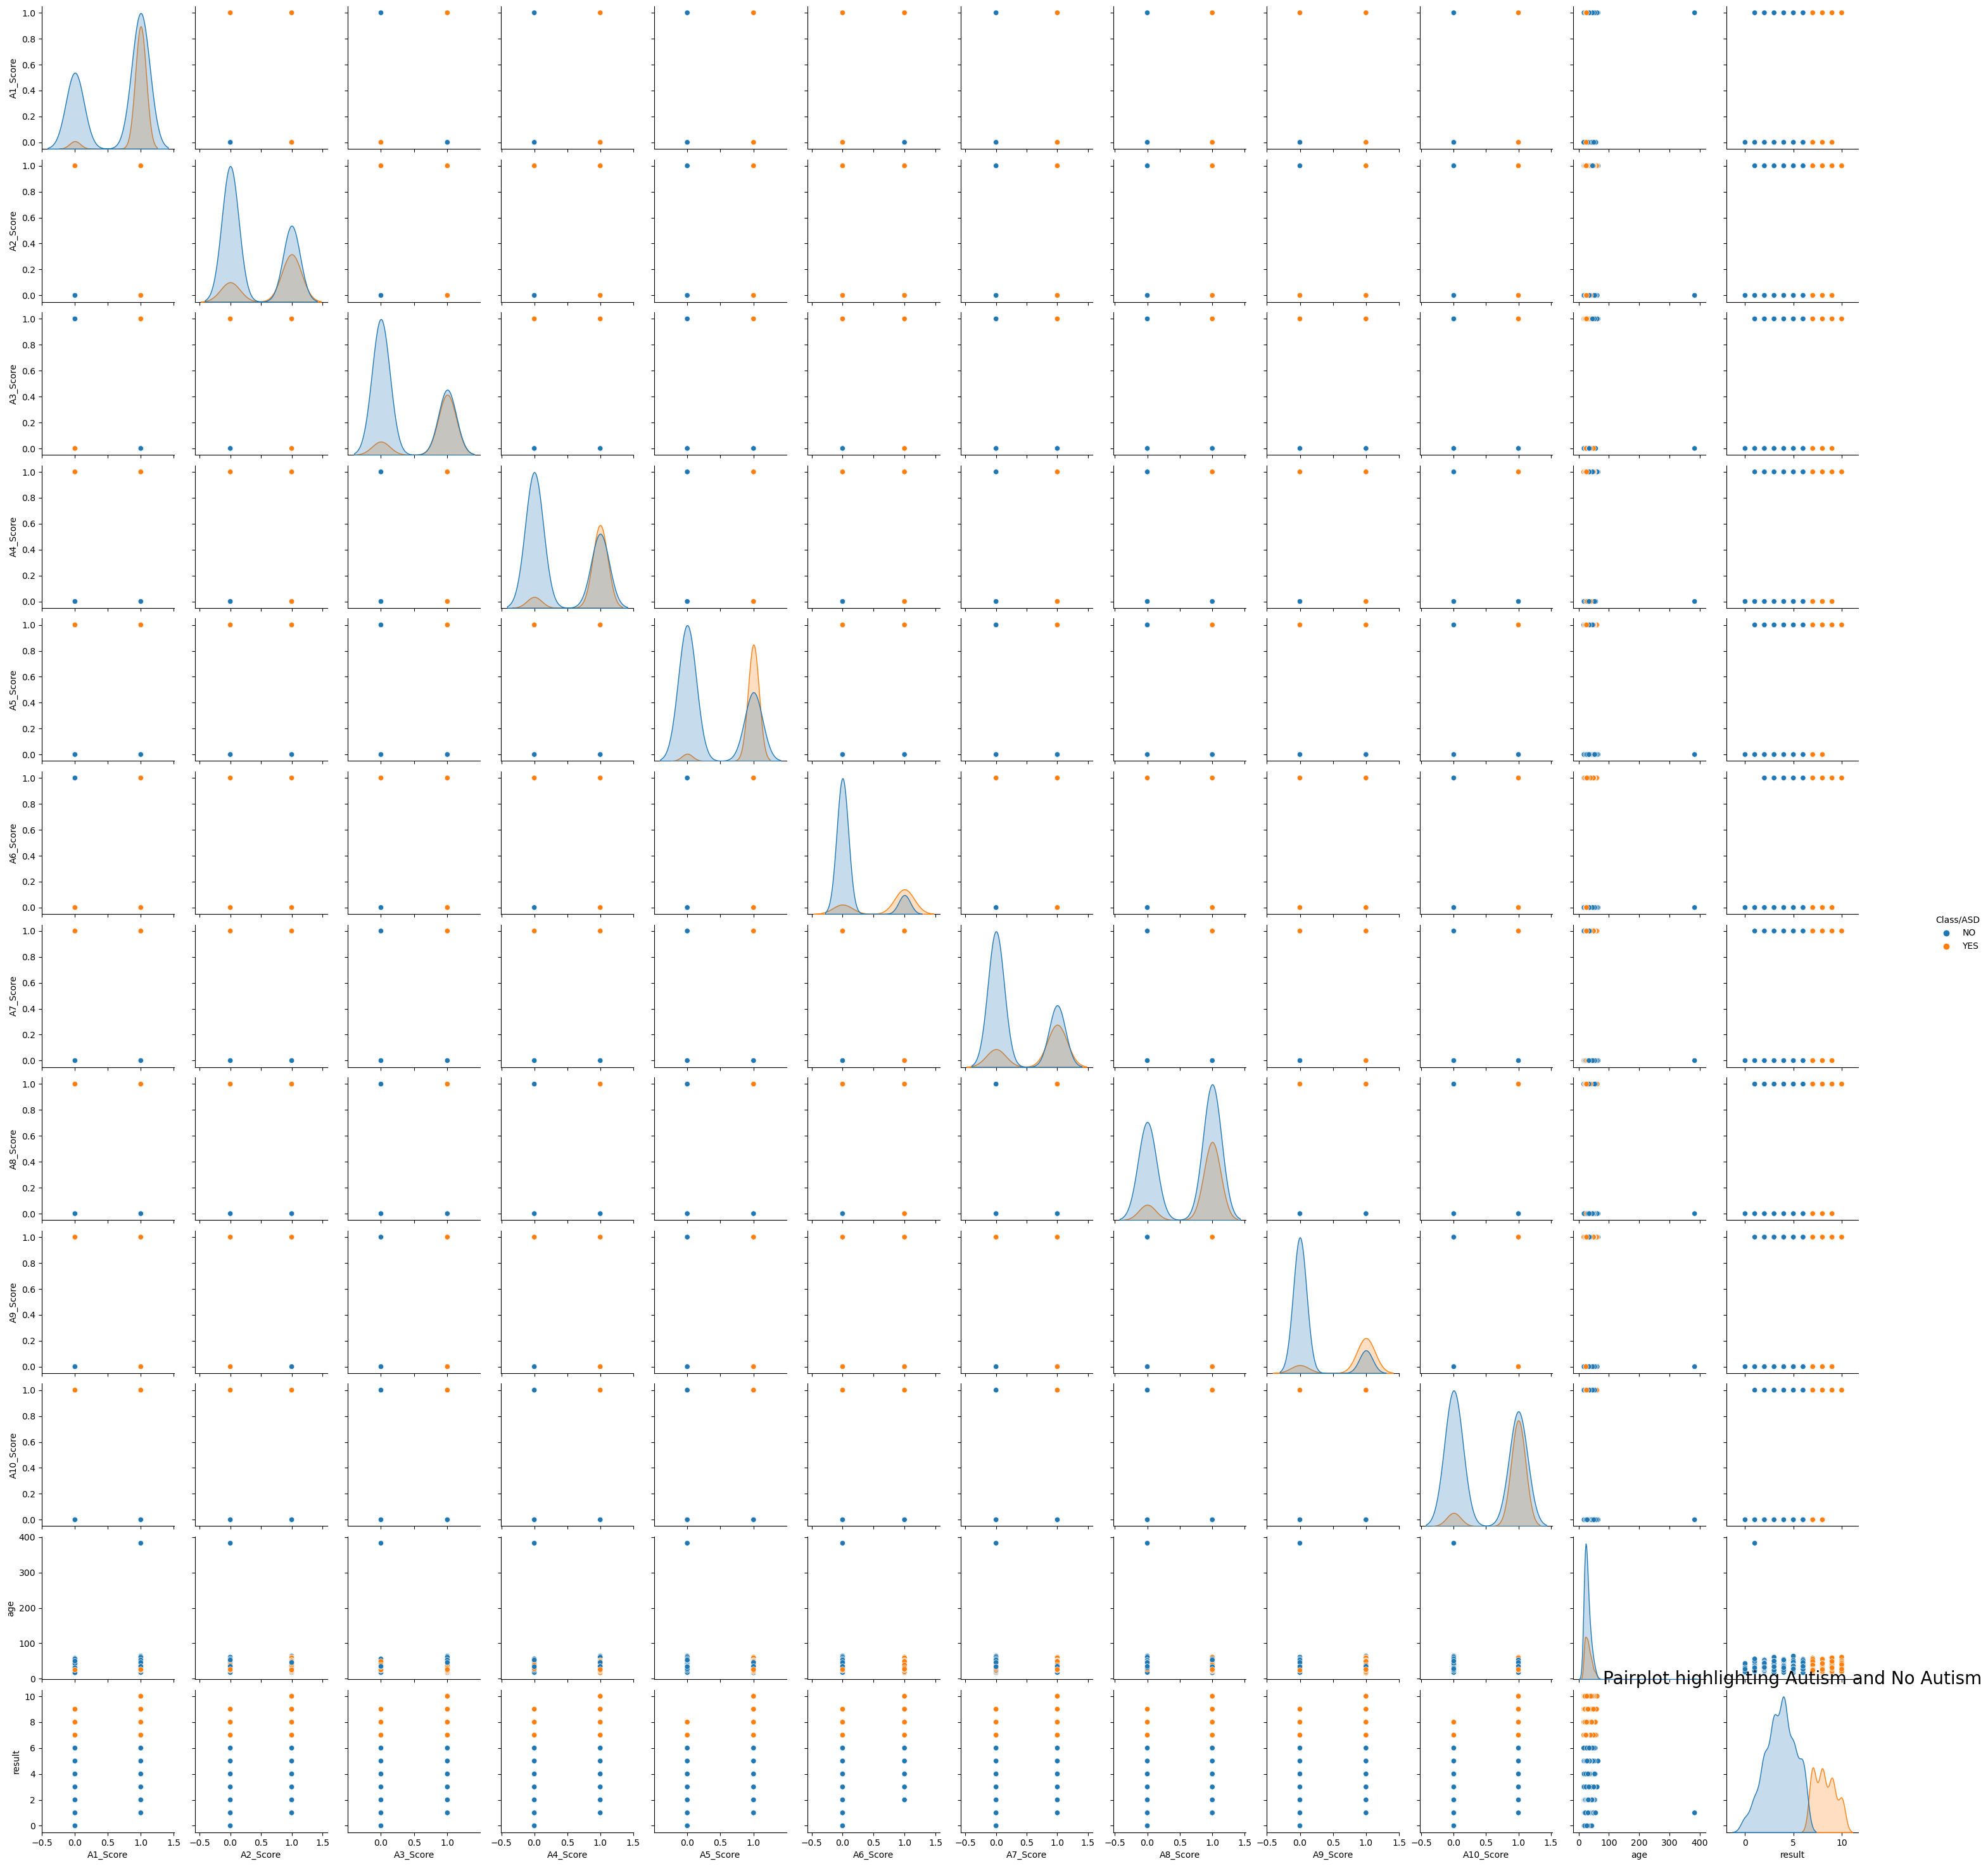

In [13]:
# Pairplot with Autism as Hue
sns.pairplot(df,hue='Class/ASD')
plt.title('Pairplot highlighting Autism and No Autism',size=20)
plt.show()

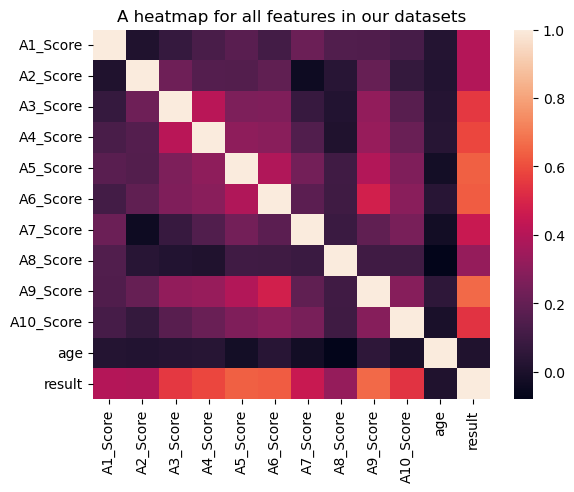

In [14]:
sns.heatmap(correlation)
plt.title('A heatmap for all features in our datasets')
plt.show()

In [15]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

# AGE AS A FACTOR 

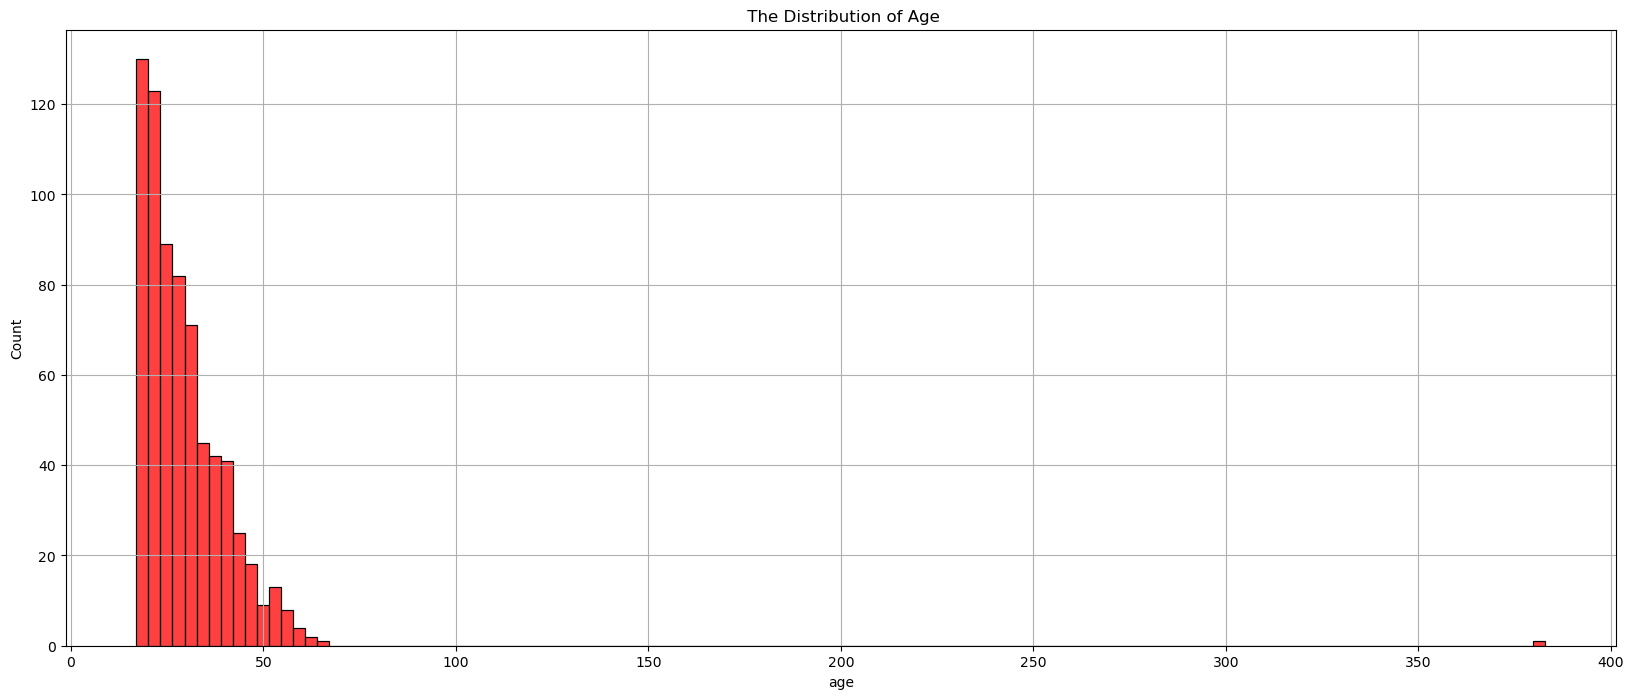

In [16]:
# The Distribution of Age ,which cohorts participated more
fig = plt.figure(figsize=(20,8))
sns.histplot(x='age',data=df,color='red')
plt.title(' The Distribution of Age')
plt.grid()
plt.show()
# The youth are more prevalent participant : To mean those with ages below 25

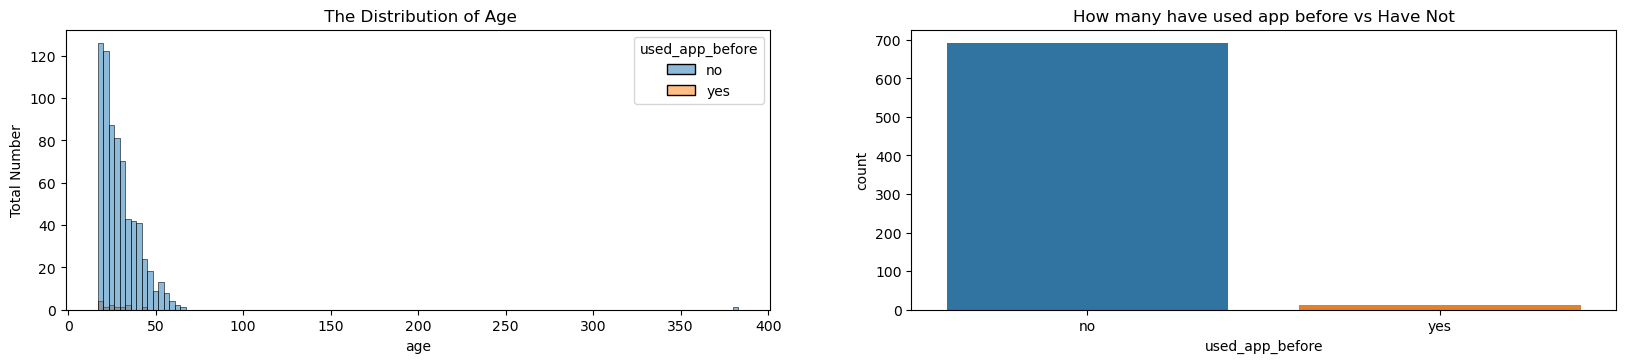

In [17]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x='age',data=df,hue='used_app_before')
plt.ylabel('Total Number')
plt.title(' The Distribution of Age')
plt.subplot(2,2,2)
sns.countplot(x='used_app_before',data=df)
plt.title('How many have used app before vs Have Not')
plt.show()
# A lot of our participants are novel :

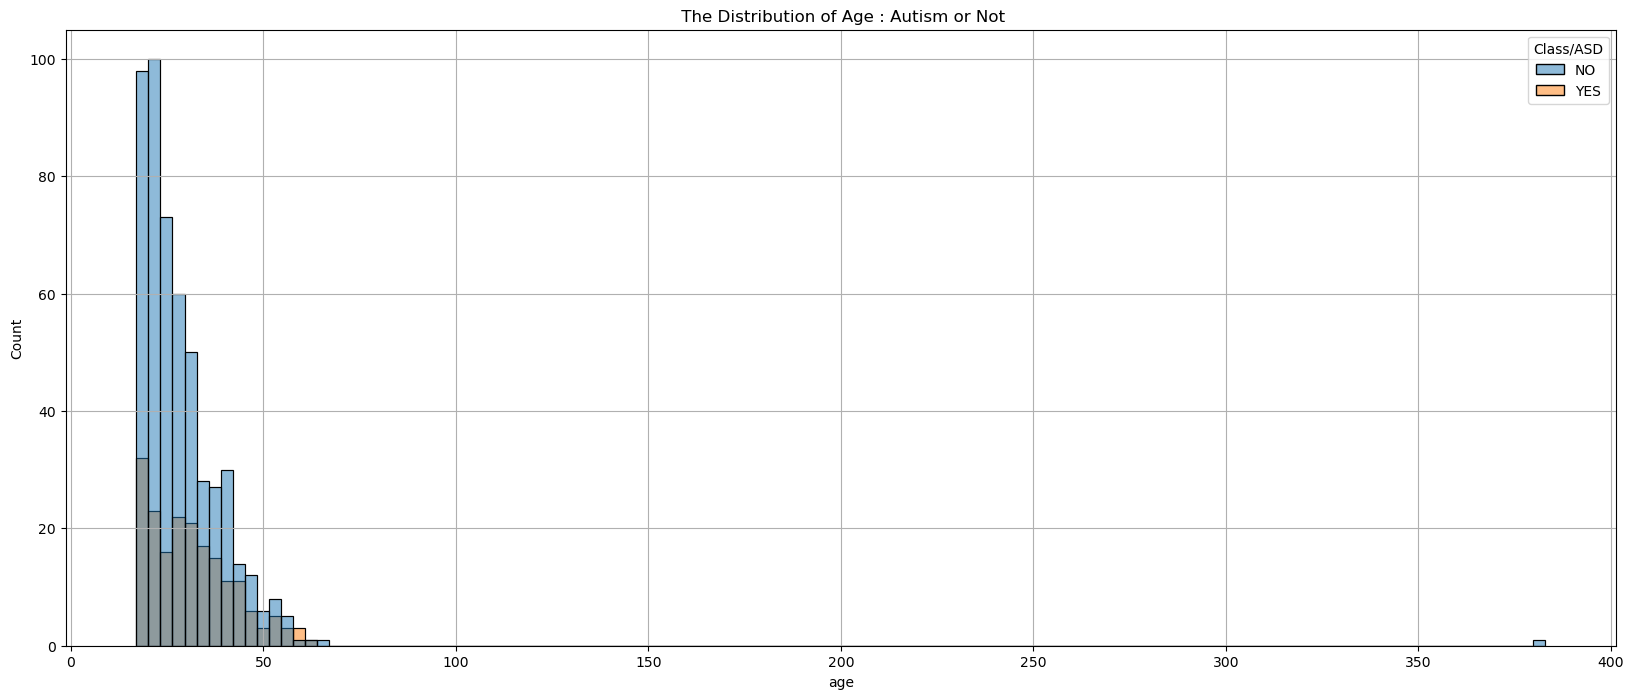

In [18]:
fig = plt.figure(figsize=(20,8))
sns.histplot(x='age',data=df,hue='Class/ASD')
plt.title(' The Distribution of Age : Autism or Not')
plt.grid()
plt.show()

<Figure size 2000x800 with 0 Axes>

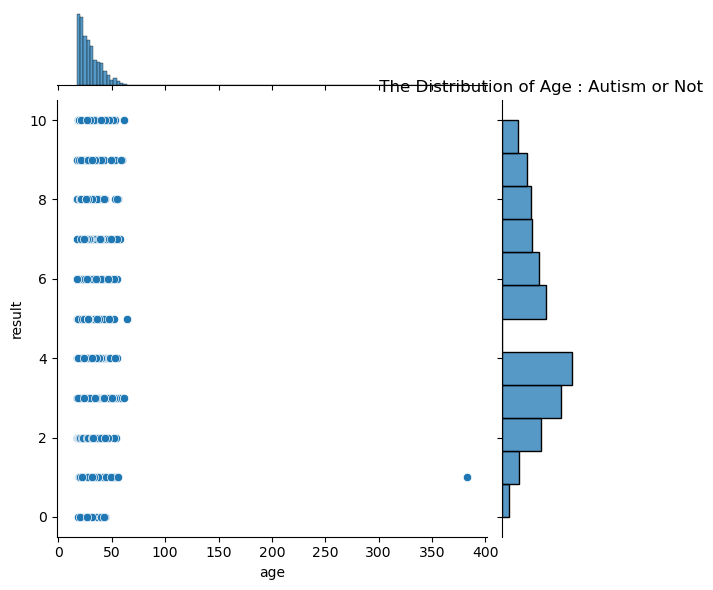

In [19]:
fig = plt.figure(figsize=(20,8))
sns.jointplot(x='age',y='result',data=df)
plt.title(' The Distribution of Age : Autism or Not')
plt.show()
# Age has a minimal effect on the result : It confirms our correlation and the below joint plot demonstrates that

# ETHNICITY AND AUTISM : Is there a Link between the two

In [20]:
df['ethnicity'].value_counts().head(10)
# The top ten ethnic communities in our study are as follows

White-European     233
Others             125
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [21]:
df['ethnicity'] = df['ethnicity'].replace('others','Others')

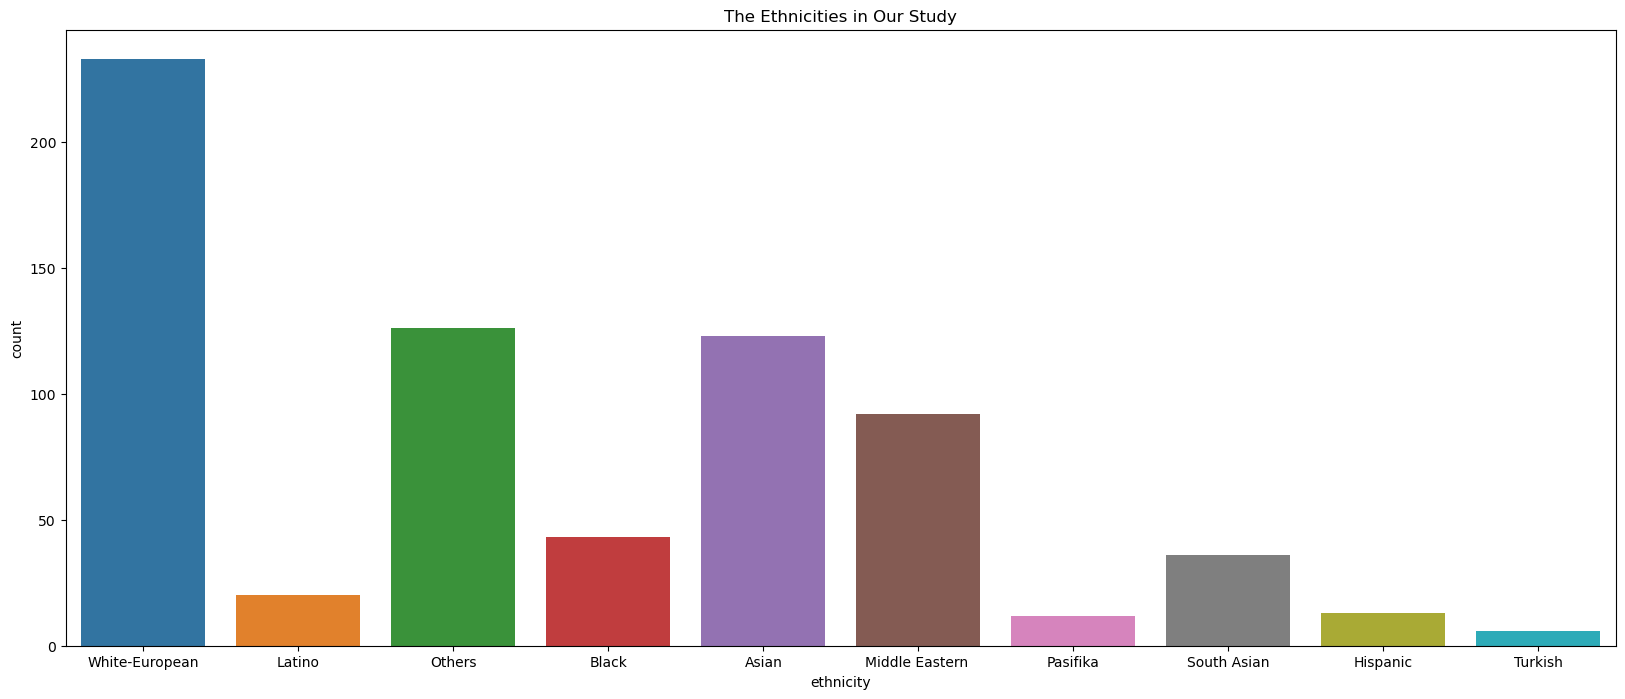

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x='ethnicity',data=df)
plt.title('The Ethnicities in Our Study')
plt.show()
# The whites took part in the study in major numbers

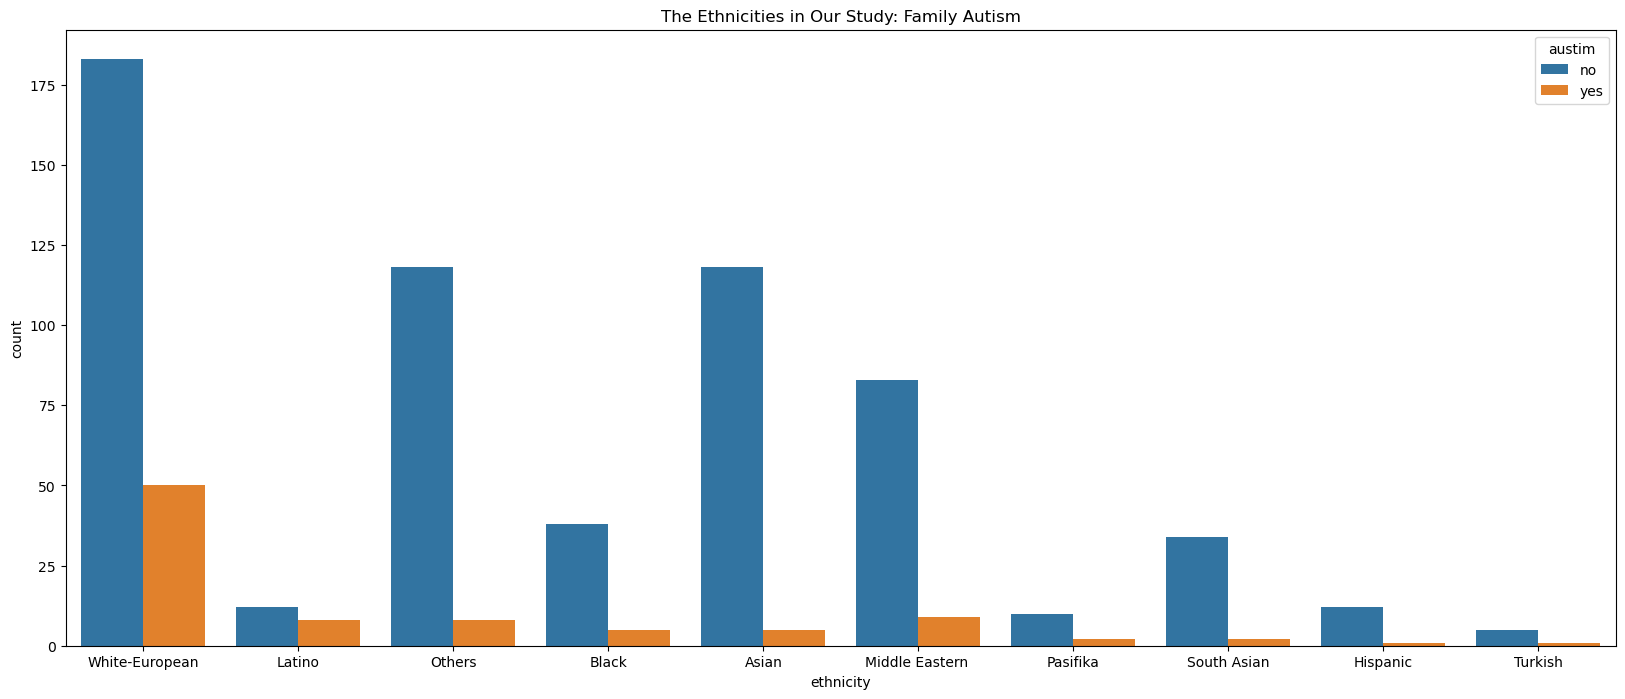

In [23]:
# Which races have a history of family autism>
plt.figure(figsize=(20,8))
sns.countplot(x='ethnicity',data=df,hue='austim')
plt.title('The Ethnicities in Our Study: Family Autism')
plt.show()
# The whites have  autism links as a major factor : What does that imply?

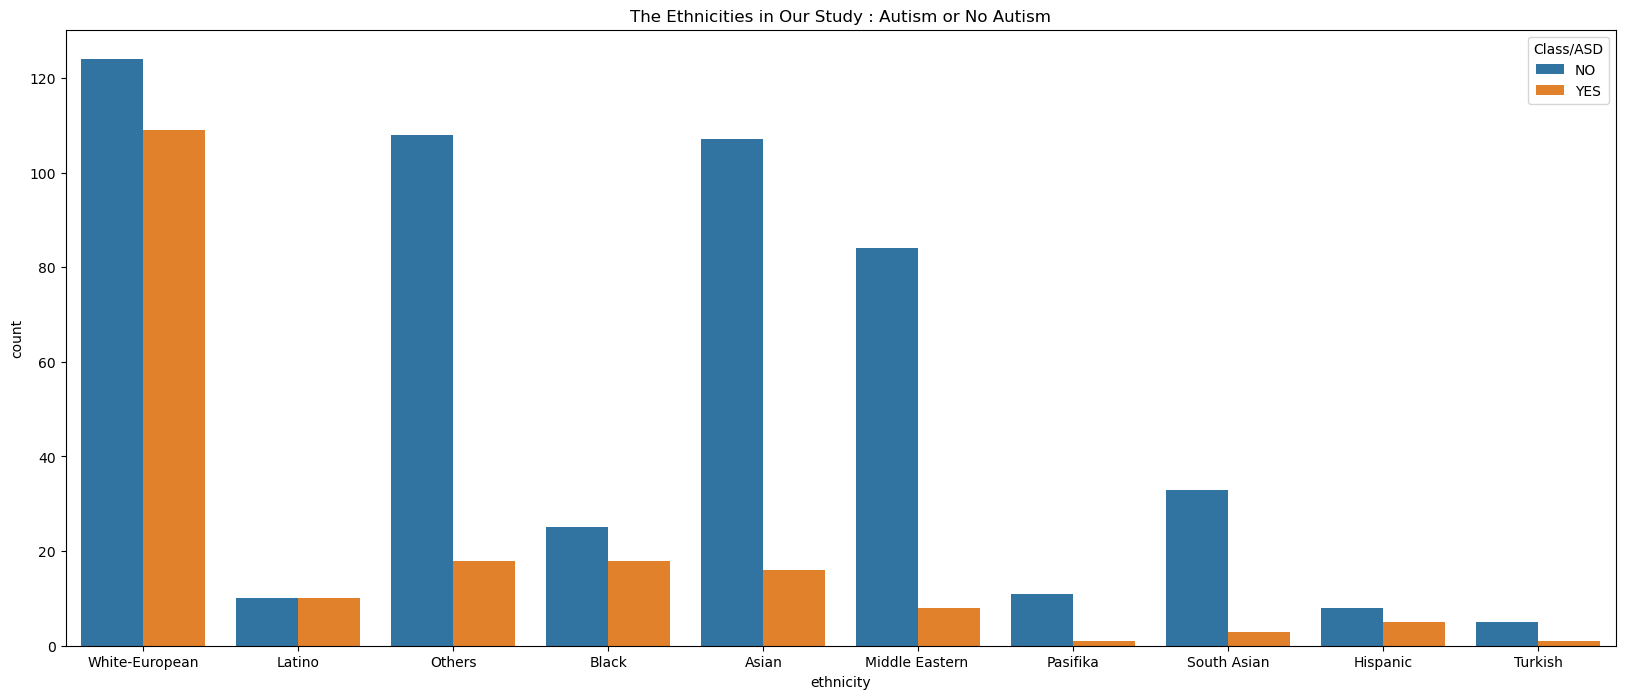

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x='ethnicity',data=df,hue='Class/ASD')
plt.title('The Ethnicities in Our Study : Autism or No Autism')
plt.show()
# The White race has more autism compared to others ,there indeed exists a relation between Ethnicity and Race : A huge one

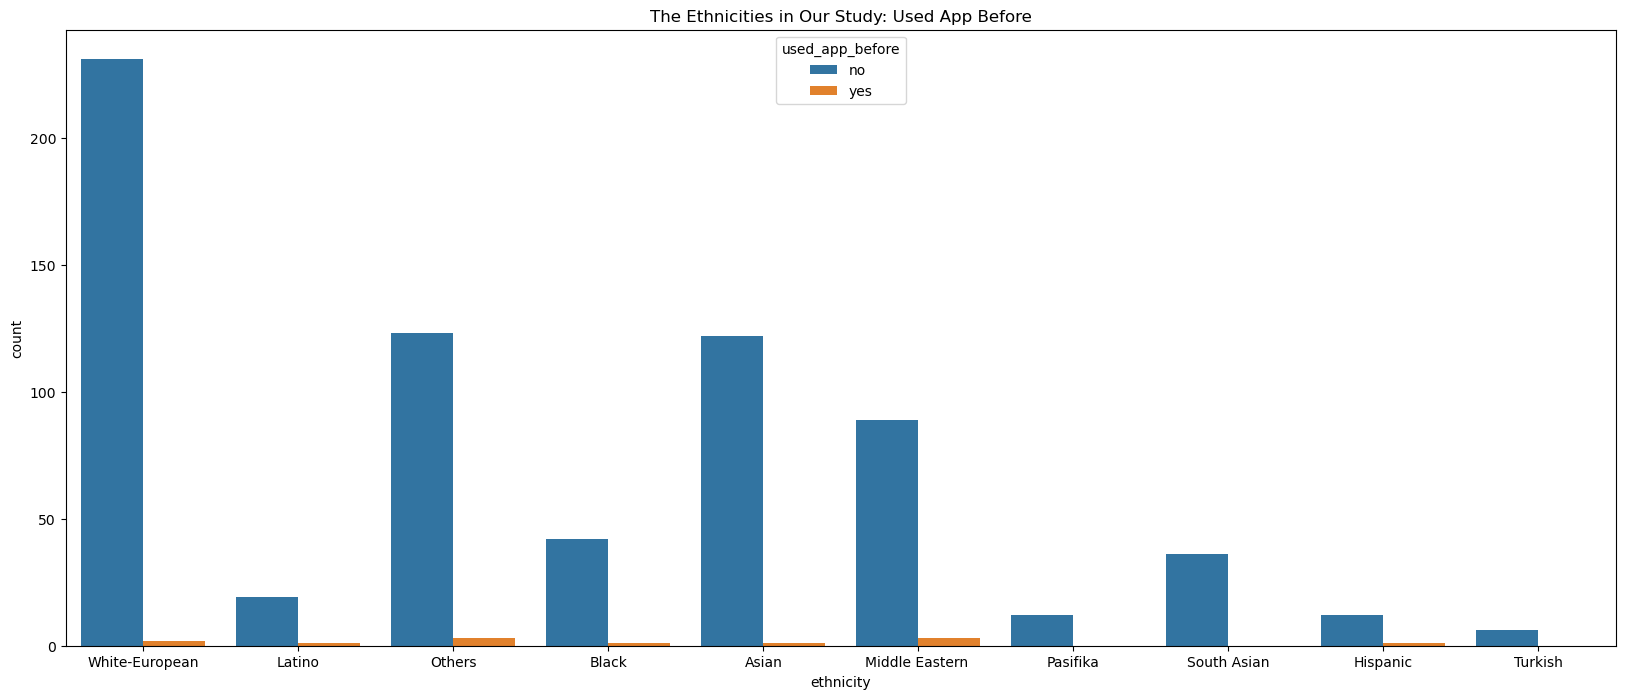

In [25]:
# Bonus : Which ethnicity has used the app before more times
plt.figure(figsize=(20,8))
sns.countplot(x='ethnicity',data=df,hue='used_app_before')
plt.title('The Ethnicities in Our Study: Used App Before')
plt.show()
# The majority are novel to our app

In [26]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [27]:
df['contry_of_res'].value_counts().head()

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Name: contry_of_res, dtype: int64

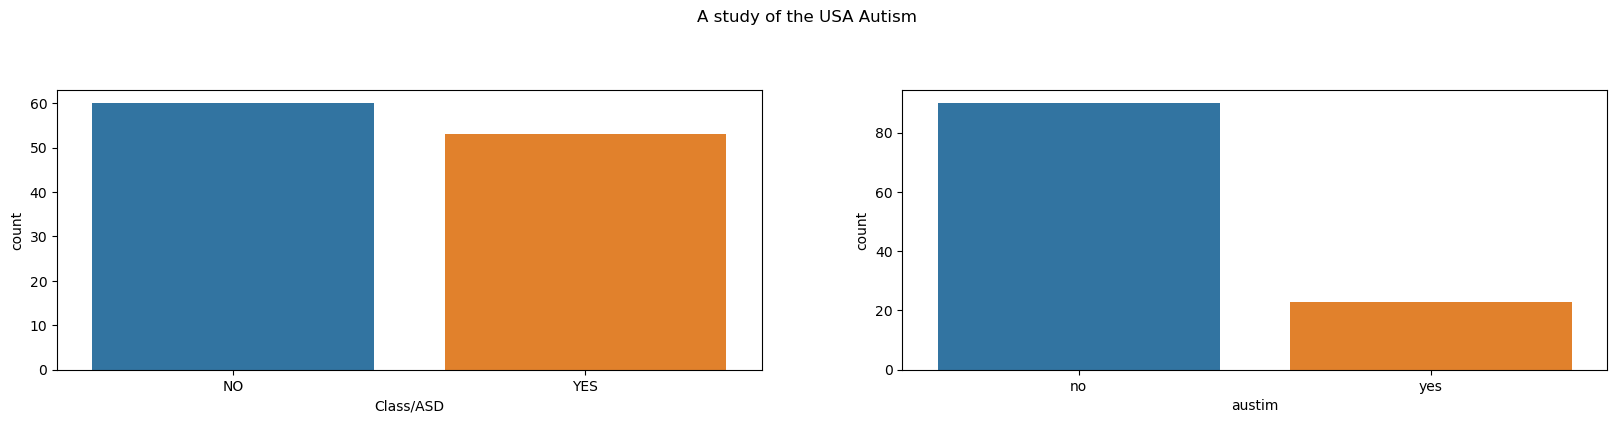

In [28]:
fig=plt.figure(figsize=(20,8))
fig.suptitle('A study of the USA Autism')
plt.subplot(2,2,1)
sns.countplot(x = df[df['contry_of_res']=='United States']['Class/ASD'])
plt.subplot(2,2,2)
sns.countplot(x = df[df['contry_of_res']=='United States']['austim'])
plt.show()
# 
# Since USA has the most number of participants we will use it as a reference 
# In this country family having autism is not an automatic link to participant getting classsified as autistic

# AUTISM AND ALL ITS LINKS

In [29]:
df['Class/ASD'].value_counts().head()
# A huge number had no autism

NO     515
YES    189
Name: Class/ASD, dtype: int64

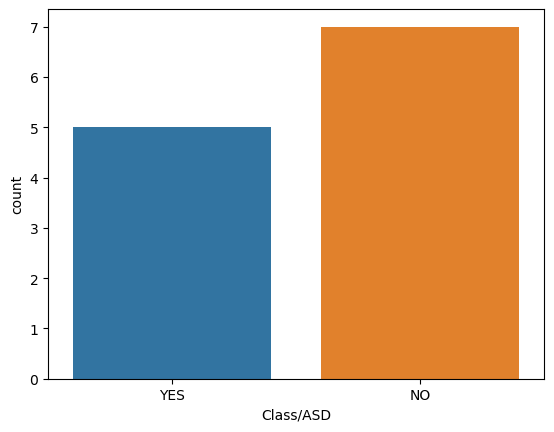

In [30]:
sns.countplot(x=df[df['used_app_before']=='yes']['Class/ASD'])
plt.show()
# Seemingly participants may be using the app out of curiosity ,maybe the just found out about the app 


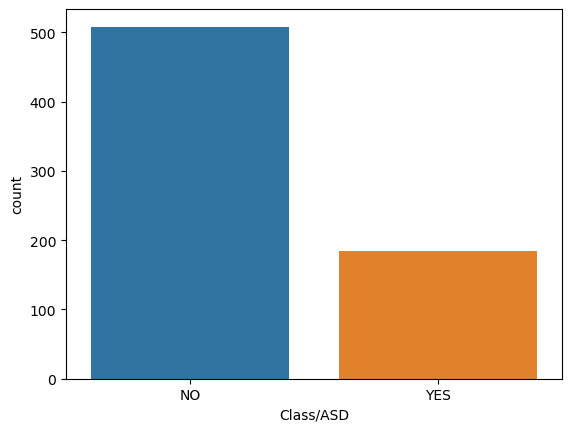

In [31]:
sns.countplot(x=df[df['used_app_before']=='no']['Class/ASD'])
plt.show()
# A majority actually had curiosity to use the app

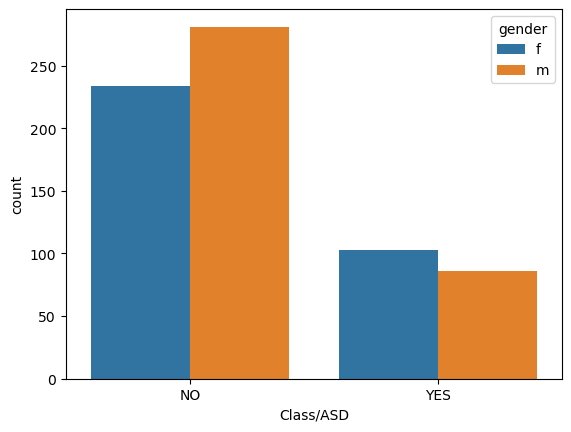

In [32]:
# Autism and Jaundice is there a link?
sns.countplot(x='Class/ASD',hue='gender',data=df)
plt.show()

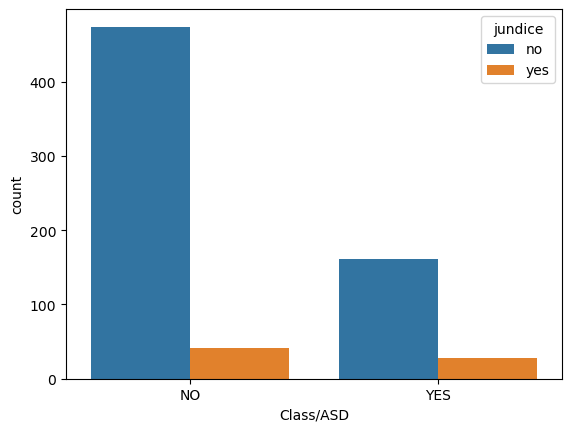

In [33]:
sns.countplot(x='Class/ASD',hue='jundice',data=df)
plt.show()

# DATA PREPROCESSING 

In [34]:
df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

In [35]:
cat_features = ['gender','ethnicity','jundice','austim','contry_of_res','used_app_before','relation','Class/ASD']
lbl_encoder = {}
for features in cat_features:
    lbl_encoder = LabelEncoder()
    df[features] = lbl_encoder.fit_transform(df[features])

In [36]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,9,0,0,64,0,6.0,18 and more,4,0
1,1,1,0,1,0,0,0,1,0,1,...,1,3,0,1,13,0,5.0,18 and more,4,0
2,1,1,0,1,1,0,1,1,1,1,...,1,3,1,1,56,0,8.0,18 and more,2,1
3,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,64,0,6.0,18 and more,4,0
4,1,0,0,0,0,0,0,1,0,0,...,0,5,0,0,22,0,2.0,18 and more,5,0


In [37]:
df.drop(['age_desc'],axis=1,inplace=True)

In [38]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [39]:
df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.022974,-0.075011,0.099916,-0.019077,0.097630,0.024271,-0.040620,0.397454,-0.039991,0.297628
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.020793,-0.047393,0.169965,0.112615,0.074555,0.142462,-0.009645,0.392540,-0.077016,0.311382
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.029468,0.000795,0.169560,0.061760,0.113697,0.054094,0.055320,0.552356,-0.028318,0.441074
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.032493,-0.056508,0.204459,0.064918,0.193820,0.046927,0.023071,0.586025,-0.066721,0.469945
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,-0.025060,-0.039688,0.063370,0.034378,0.090009,-0.019358,0.000374,0.639706,-0.018588,0.537004
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.034686,-0.083615,0.170629,0.078366,0.114048,-0.010930,0.087378,0.630012,-0.132854,0.592091
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.026493,0.061900,0.018187,0.030850,-0.008610,-0.017262,-0.022505,0.454848,0.002692,0.351429
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.080225,0.064127,-0.015324,0.012101,0.034845,-0.044392,-0.041155,0.324020,0.005912,0.237161
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.053967,0.006940,0.122952,0.057717,0.167644,-0.073850,0.049567,0.661205,-0.090796,0.635576
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,-0.008073,-0.055246,0.116347,0.052201,0.117969,0.025746,-0.041860,0.537205,-0.030541,0.385917


In [40]:
X = df.drop(['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
             'A9_Score','A10_Score','Class/ASD','gender','relation'],axis=1)
y = df['Class/ASD']

In [41]:
X.columns

Index(['age', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result'],
      dtype='object')

In [42]:
X.corr()

,age,ethnicity,jundice,austim,contry_of_res,used_app_before,result
age,1.000000,0.122850,0.064919,0.094970,0.050183,-0.024900,0.009840
ethnicity,0.122850,1.000000,0.077398,0.158658,0.139520,-0.033554,0.216605
jundice,0.064919,0.077398,1.000000,0.157793,0.049917,0.030407,0.094842
austim,0.094970,0.158658,0.157793,1.000000,-0.020307,0.014682,0.192033
contry_of_res,0.050183,0.139520,0.049917,-0.020307,1.000000,-0.017405,0.026433
used_app_before,-0.024900,-0.033554,0.030407,0.014682,-0.017405,1.000000,0.010975
result,0.009840,0.216605,0.094842,0.192033,0.026433,0.010975,1.000000


In [43]:
df.corr()
# Using correlation to eliminate those that are negatively correlated with our target

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.022974,-0.075011,0.099916,-0.019077,0.097630,0.024271,-0.040620,0.397454,-0.039991,0.297628
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.020793,-0.047393,0.169965,0.112615,0.074555,0.142462,-0.009645,0.392540,-0.077016,0.311382
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.029468,0.000795,0.169560,0.061760,0.113697,0.054094,0.055320,0.552356,-0.028318,0.441074
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.032493,-0.056508,0.204459,0.064918,0.193820,0.046927,0.023071,0.586025,-0.066721,0.469945
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,-0.025060,-0.039688,0.063370,0.034378,0.090009,-0.019358,0.000374,0.639706,-0.018588,0.537004
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.034686,-0.083615,0.170629,0.078366,0.114048,-0.010930,0.087378,0.630012,-0.132854,0.592091
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.026493,0.061900,0.018187,0.030850,-0.008610,-0.017262,-0.022505,0.454848,0.002692,0.351429
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.080225,0.064127,-0.015324,0.012101,0.034845,-0.044392,-0.041155,0.324020,0.005912,0.237161
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.053967,0.006940,0.122952,0.057717,0.167644,-0.073850,0.049567,0.661205,-0.090796,0.635576
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,-0.008073,-0.055246,0.116347,0.052201,0.117969,0.025746,-0.041860,0.537205,-0.030541,0.385917


# Machine Learning : Ensemble vs Decision Tree Models

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error

In [45]:
rfc = RandomForestRegressor()
dtc = DecisionTreeRegressor()
lgc = LogisticRegression()

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [47]:
rfc.fit(X_train,y_train)
forest_pred = rfc.predict(X_test)
print(mean_squared_error(y_test,forest_pred))

0.0


In [48]:
lgc.fit(X_train,y_train)
log_pred = lgc.predict(X_test)
print(mean_squared_error(y_test,log_pred))

0.0


C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
dtc.fit(X_train,y_train)
dec_pred = rfc.predict(X_test)
print(mean_squared_error(y_test,dec_pred))

0.0


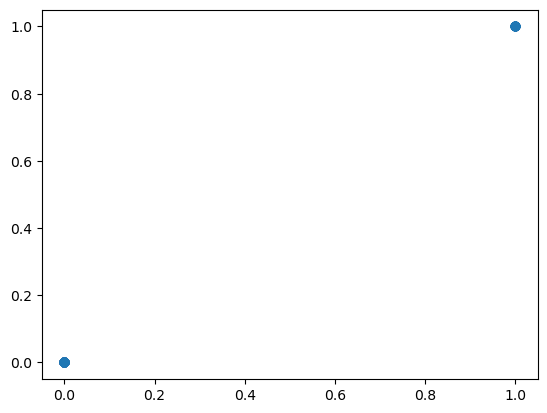

In [50]:
plt.scatter(y_test,dec_pred)
plt.show()

NB: MACHINE LEARNING IS NOT APPLICABLE IN OUR CASE ,I INTENTIONALY LEFT THE CODE ,SINCE I DISCOVERED THAT I HAD JUST OVERFITT MY
    MODEL 

# DEEP LEARNING :

In [51]:
X = X.values

In [52]:
 y = y.values.reshape(-1,1)

In [53]:
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
scaler = StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [76]:
X_sc_train,X_sc_test,y_sc_train,y_sc_test = train_test_split(X_scaled,y_scaled,test_size=0.3,random_state=101)

In [77]:
X_sc_train.shape

(492, 7)

In [78]:
y_sc_train.shape

(492, 1)

In [123]:
class AutismClassifier(nn.Module):
    def __init__(self,input_dim=7,hidden_dim=49,output_dim =1):
        super().__init__()
        self.linear_layer1 = nn.Linear(input_dim,hidden_dim)
        self.linear_layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
    def forward (self,x):
        x = F.relu(x)
        x =self.linear_layer1(x)
        x = self.linear_layer2(x)
        x = self.out(x)
        x = F.relu(x)
        return x
        
        

In [124]:
model = AutismClassifier()

In [125]:
model

AutismClassifier(
  (linear_layer1): Linear(in_features=7, out_features=49, bias=True)
  (linear_layer2): Linear(in_features=49, out_features=49, bias=True)
  (out): Linear(in_features=49, out_features=1, bias=True)
)

In [126]:
X_sc_train = torch.from_numpy(X_sc_train).type(torch.Tensor)
X_sc_test = torch.from_numpy(X_sc_test).type(torch.Tensor)
y_sc_train = torch.from_numpy(y_sc_train).type(torch.Tensor)
y_sc_test = torch.from_numpy(y_sc_test).type(torch.Tensor)

TypeError: expected np.ndarray (got Tensor)

In [127]:
#scaler.inverse_transform(model.forward(X_sc_test).detach().numpy())

In [128]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [129]:
# Training and Testing loop
epochs  = 200
for epoch in range(epochs):
    y_pred = model.forward(X_sc_train)
    loss = criterion(y_sc_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        model.eval()
        y_pred = model.forward(X_sc_test)
        test_loss = criterion(y_sc_test,y_pred)
        if epoch % 10 == 0:
            print(f"The epoch is {epoch} the training loss is | {loss} and testing_loss is:{test_loss}")
        

The epoch is 0 the training loss is | 1.0314505100250244 and testing_loss is:0.9837900400161743
The epoch is 10 the training loss is | 0.9919826984405518 and testing_loss is:0.9438929557800293
The epoch is 20 the training loss is | 0.7960904240608215 and testing_loss is:0.7681484818458557
The epoch is 30 the training loss is | 0.6633415818214417 and testing_loss is:0.6513027548789978
The epoch is 40 the training loss is | 0.574012041091919 and testing_loss is:0.5776845216751099
The epoch is 50 the training loss is | 0.5159615874290466 and testing_loss is:0.531000554561615
The epoch is 60 the training loss is | 0.47670120000839233 and testing_loss is:0.49643099308013916
The epoch is 70 the training loss is | 0.4491974711418152 and testing_loss is:0.471116304397583
The epoch is 80 the training loss is | 0.4285380244255066 and testing_loss is:0.4506463408470154
The epoch is 90 the training loss is | 0.4142930209636688 and testing_loss is:0.4386386275291443
The epoch is 100 the training lo

In [137]:
with torch.inference_mode():
    predictions = model.forward(X_sc_test).detach().numpy()

In [145]:
autistic_predictions = scaler.inverse_transform(predictions).round()
print(autistic_predictions.T)

[[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]]


THE AIM OF THE PROJECT WAS TO BUILD A CLASSIFIER THAT TRIES AND LEARNS FORM THE VARIOUS FEATURES AND THEN MAKES PREDICTIONS.
I HAVE ACHIEVED THAT AND AT THE SAME TIME ESTABLISHED THAT TRADITIONAL ML METHODS SUCH AS DECISION TREES AND RANDOM FOREST
CAN AT SOMETIMES FAIL TO APPLY .HAVING GOTTEN AN ACCURACY OF 100%  WAS A CLEAR WARNING OF OVERFITTING .
DEEP LEARNING HOWEVER RESOLVED THIS PROBLEM. MY MODEL WAS A LINEAR MODEL WITH 3 LAYERS ,ONE INPUT LAYER ,ONE HIDDEN LAYER AND
AN OUTPUT LAYER . I USED RELU ACTIVATION BEFORE THE TENSORS WERE ACTUALLY PASSED IN MY MODEL AND USED IT AGAIN AT THEOUTPUT 
LAYER .
 
 # PERSONALLY THIS WAS AN INTERESTING PROJECT  ALTHOUGH MARRED BY UNCERTAINITIES AND DIFFICULTIES : I HOPE IT HELPS OTHER DATA SCIENTISTS. 
 
 # THANK YOU : EST FINIR 